# Analysis & Image of data obtained by scrapping sites : IMDB & SensCritique


#### Obtaining and separating data that may be potentially interesting

In [11]:
import json
import pandas as pd
import seaborn as sns
from pandas import Series
import matplotlib.pyplot as plt

with open('../Data/final_data.json' ,'r') as f:
    data = json.loads(f.read())

df = pd.json_normalize(data, meta='title', record_path=['results'])


df['year'] = df['year'].astype(int)
df['rating'] = pd.to_numeric(df['rating'])
df['metascore'] = pd.to_numeric(df['metascore'])/10
df['rating sc'] = pd.to_numeric(df['rating sc'])
df = df[['title','year', 'rating', 'metascore', 'genre', 'rating sc','name french']]

In [12]:
df.head()

,title,year,rating,metascore,genre,rating sc,name french
0,The Shawshank Redemption,1994,9.3,8.1,Drama,8.1,Les Évadés
1,The Godfather,1972,9.2,10.0,Crime Drama,8.5,Le Parrain
2,The Dark Knight,2008,9.1,8.4,Action Crime Drama,8.0,The Dark Knight : Le Chevalier noir
3,The Godfather: Part II,1974,9.0,9.0,Crime Drama,8.3,"Le Parrain, 2ᵉ partie"
4,12 Angry Men,1957,9.0,9.6,Crime Drama,8.7,12 Hommes en colère


#### Displaying all movies with three ratings. rating among ordinary viewers, film critics' rating, as well as the site's score

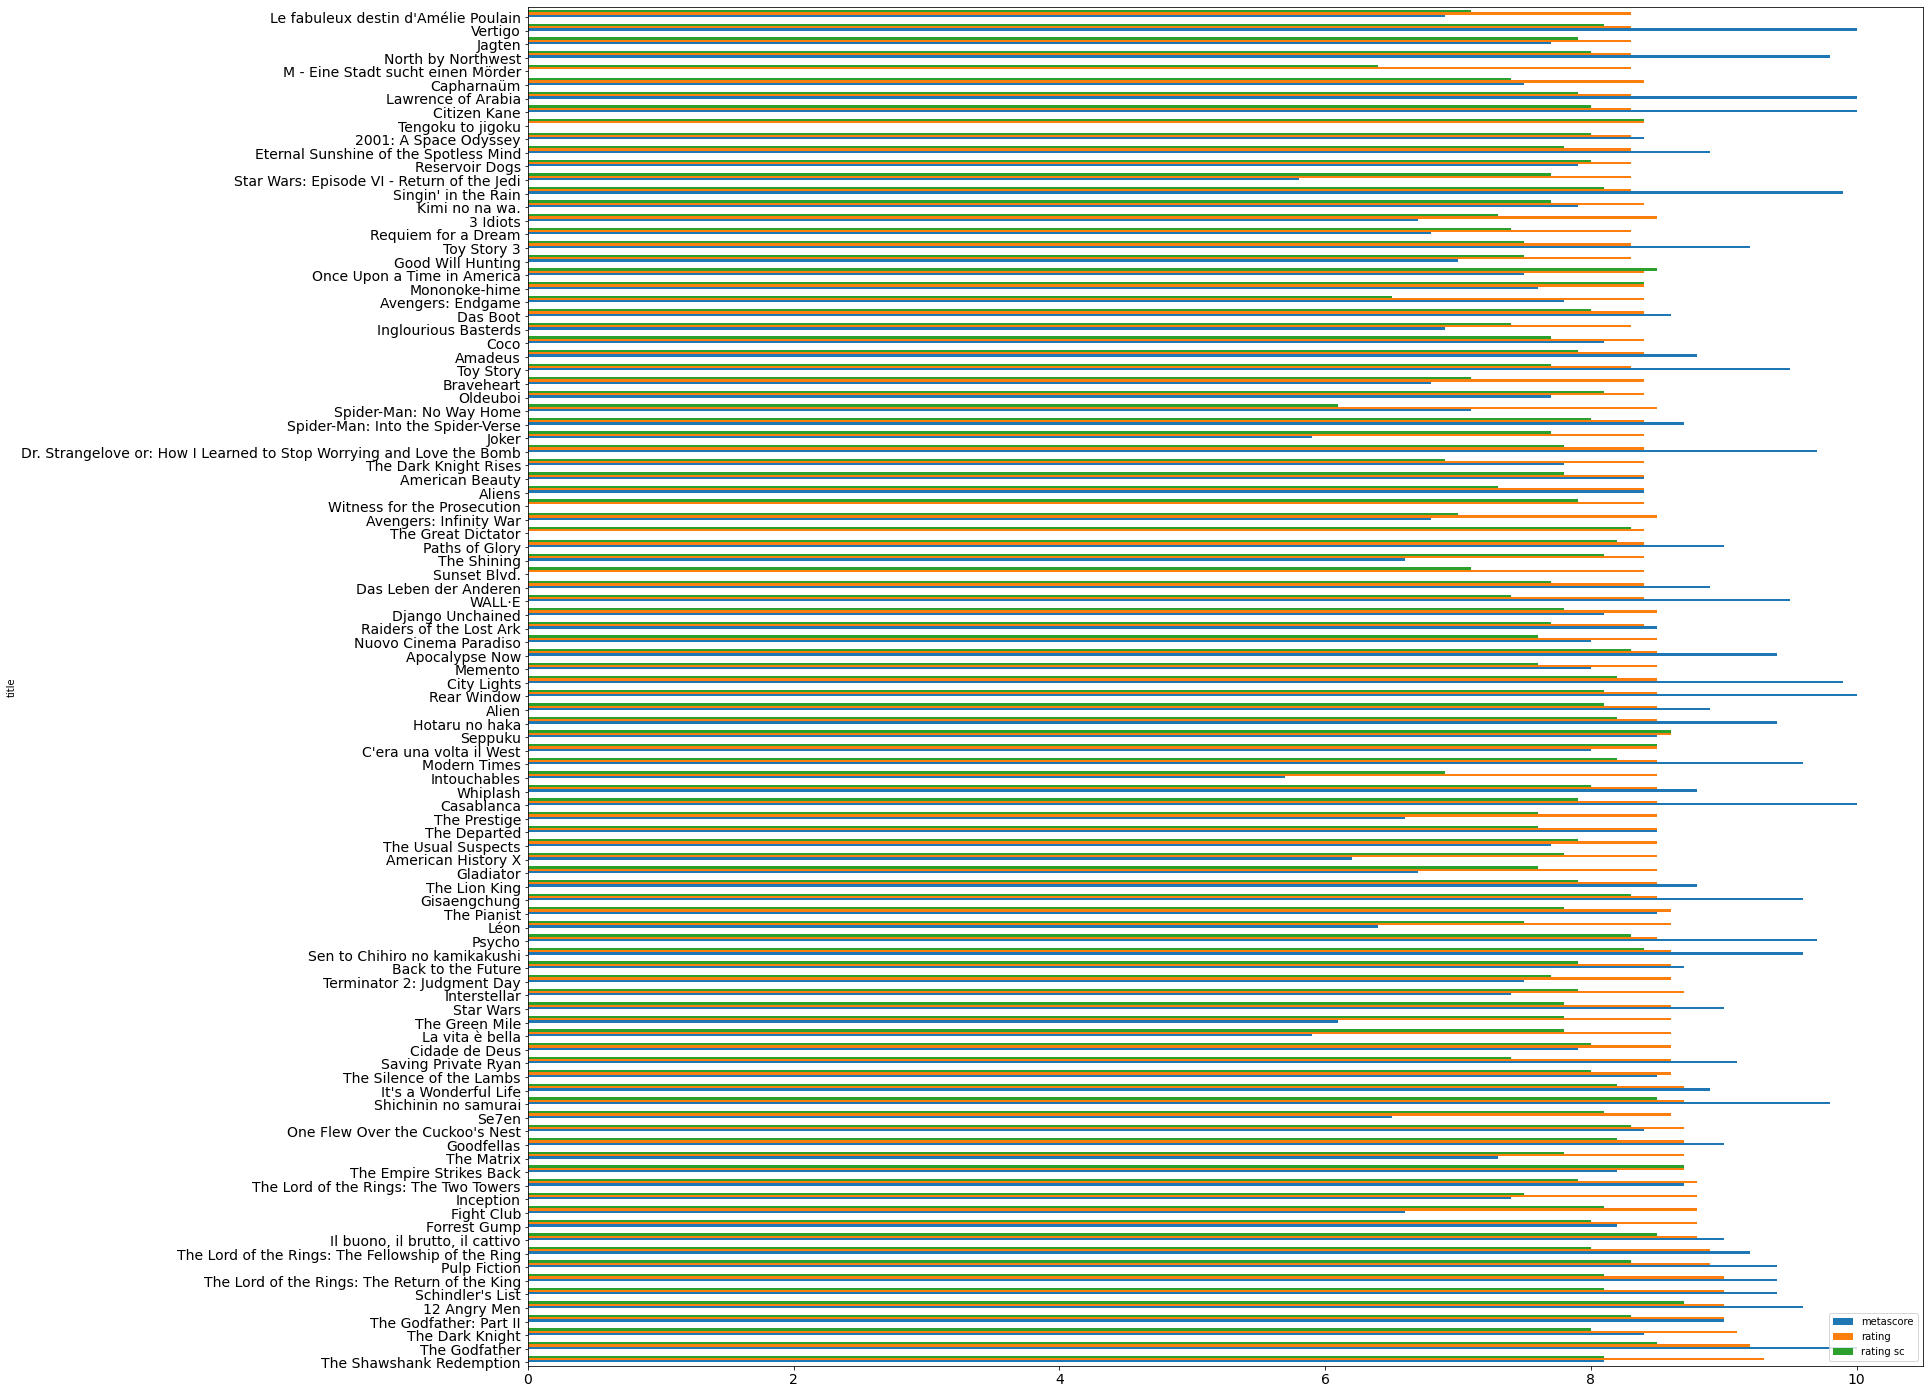

In [3]:
plt.rcParams['figure.figsize'] = [25, 25]

df.plot(x='title', y=['metascore', 'rating', 'rating sc'], kind='barh', align='edge', fontsize=14)

plt.show()

## Films genre per Decade Displaying

Preparation and setting dataframe's content

In [4]:
df = df[['title', 'year', 'metascore', 'rating', 'genre']]

s = df['genre'].str.split(' ').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genre'
del df['genre']
df2 = df.join(s)

df2 = df2.groupby(['year', 'genre'], sort=True)['year'].count()
df_year = df2.to_frame(name = 'genre count').reset_index()

df_year['decade'] = (10 * (df_year['year'] // 10)).astype(str) + 's'

df_dec = df_year.groupby(['decade', 'genre'], sort=True)['year'].count()
df_dec = df_dec.to_frame(name = 'genre count').reset_index()

Visualisation

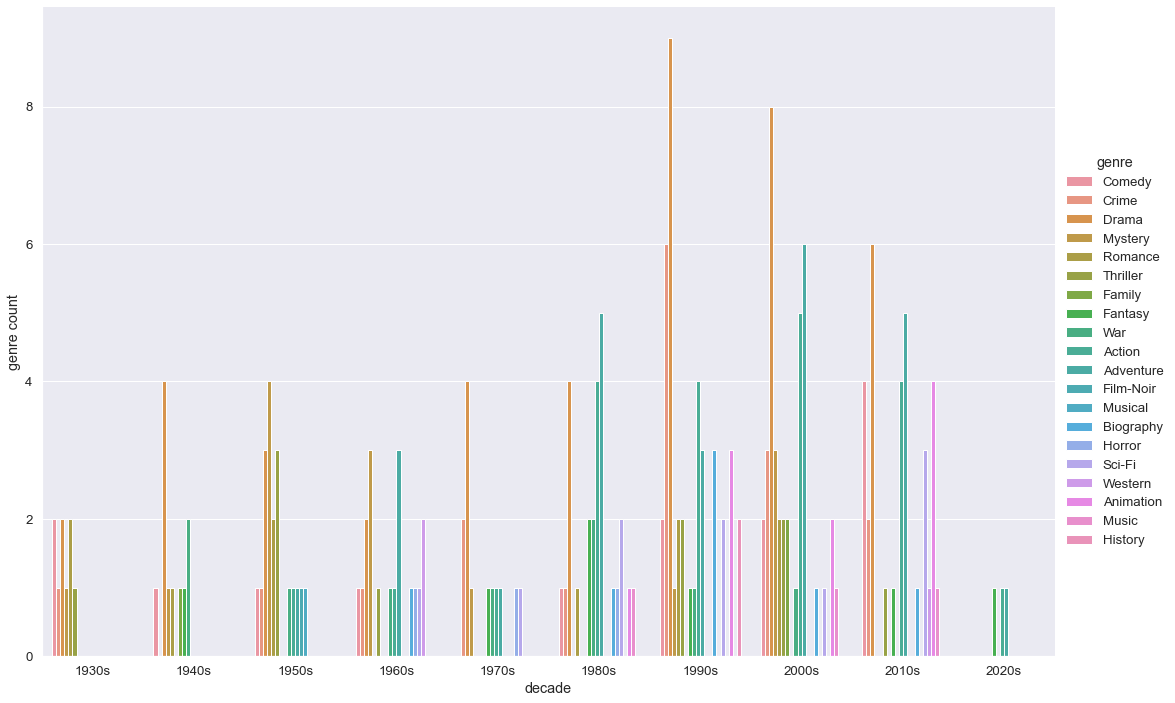

In [5]:
plt.rcParams['figure.figsize'] = (10, 5)

sns.set_context('notebook', font_scale=1.2)
sns.set_style('darkgrid')

sns.catplot(x='decade', y='genre count', hue='genre', data=df_dec, kind='bar', height=10, aspect=15/10)
sns.despine()

Show data in function of selected genre er year

                                title  year  rating  metascore decade  \
44                       Modern Times  1936     8.5        9.6  1930s   
44                       Modern Times  1936     8.5        9.6  1930s   
44                       Modern Times  1936     8.5        9.6  1930s   
50                        City Lights  1931     8.5        9.9  1930s   
50                        City Lights  1931     8.5        9.9  1930s   
50                        City Lights  1931     8.5        9.9  1930s   
95  M - Eine Stadt sucht einen Mörder  1931     8.3        NaN  1930s   
95  M - Eine Stadt sucht einen Mörder  1931     8.3        NaN  1930s   
95  M - Eine Stadt sucht einen Mörder  1931     8.3        NaN  1930s   

       genre  
44    Comedy  
44     Drama  
44   Romance  
50    Comedy  
50     Drama  
50   Romance  
95     Crime  
95   Mystery  
95  Thriller  


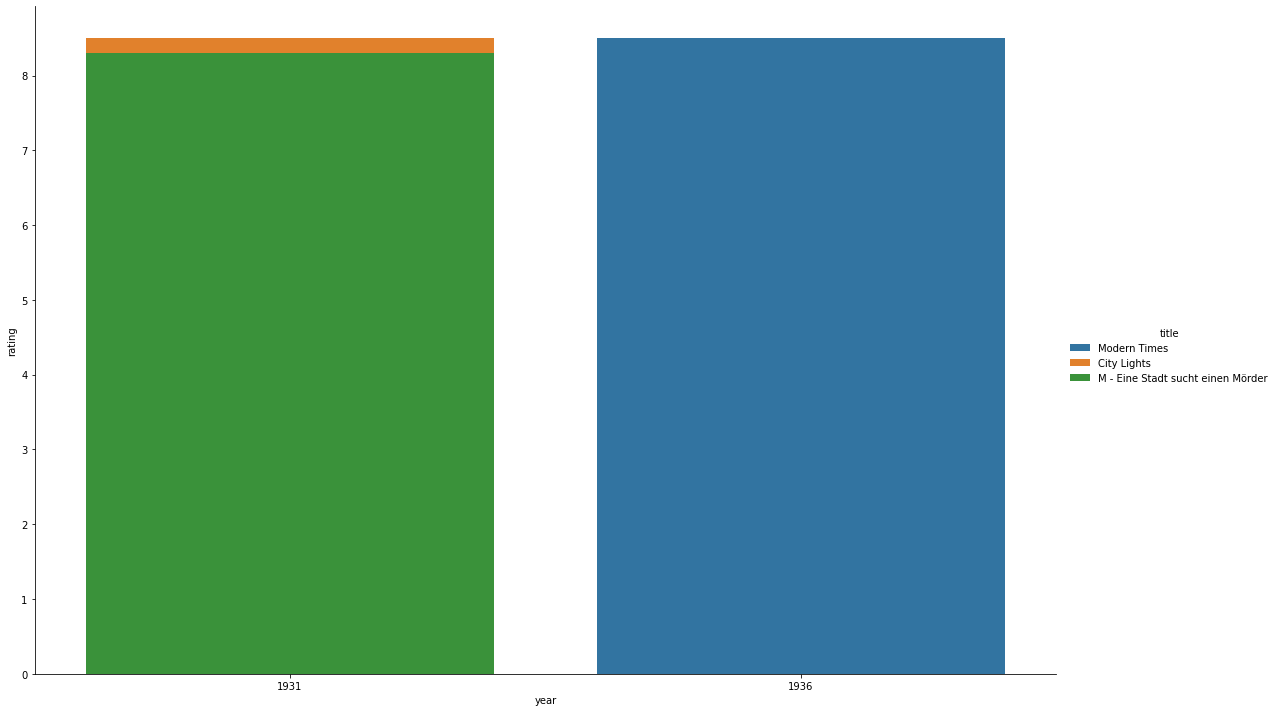

In [15]:
def show_decade(decade):
    df = pd.json_normalize(data, meta='title', record_path=['results'])

    df['year'] = df['year'].astype(int)
    df['rating'] = pd.to_numeric(df['rating'])
    df['metascore'] = pd.to_numeric(df['metascore'])/10
    df['decade'] = (10 * (df['year'] // 10)).astype(str) + 's'

    df = df[['title','year', 'rating', 'metascore', 'genre', 'decade']]

    index_decades = df[ df['decade'] != decade ].index

    df.drop(index_decades, inplace = True)

    s = df['genre'].str.split(' ').apply(Series, 1).stack()
    s.index = s.index.droplevel(-1)
    s.name = 'genre'
    del df['genre']
    df2 = df.join(s)
    print(df2)
    sns.catplot(x='year', y='rating', hue='title', data=df2, kind='bar', height=10, aspect=15/10, dodge=False)
    sns.despine()

show_decade('1930s')

    title  rating  metascore  rating sc
18  Se7en     8.6        6.5        8.1


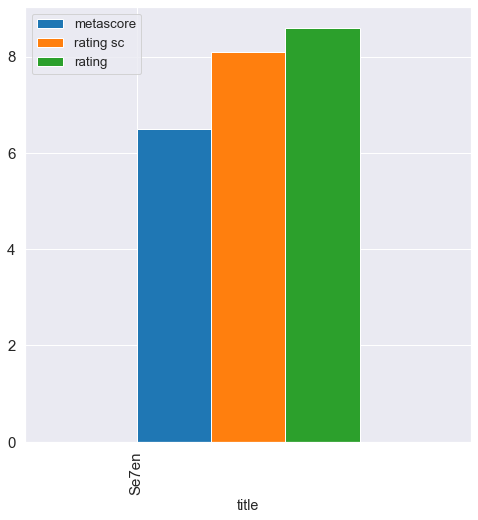

In [32]:
def show_movie(title):
    plt.rcParams['figure.figsize'] = (8, 8)
    df = pd.json_normalize(data, meta='title', record_path=['results'])

    df['rating'] = pd.to_numeric(df['rating'])
    df['rating sc'] = pd.to_numeric(df['rating sc'])
    df['metascore'] = pd.to_numeric(df['metascore'])/10

    df = df[['title', 'rating', 'metascore', 'rating sc']]

    index_title = df[df['title'] != title].index
    df.drop(index_title, inplace = True)

    df.plot(x='title', y=['metascore', 'rating sc', 'rating'], kind='bar', align='edge', fontsize=15)
    plt.show()

show_movie('Se7en')